In [4]:
%matplotlib inline
from imports import *
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 16}
plt.rc('font', **font)
order = ['node','python','ruby']

# Work starts here
# Load installed packages

In [5]:
packages = pd.read_csv('../data/cleaned_installed_packages.csv')
packages.package.fillna('nan', inplace=True)
packages.rename(columns = {'operating':'os'}, inplace=True)
packages['last_updated'] = pd.to_datetime(packages['last_updated'])
len(packages)

998727

In [6]:
packages.query('os == "Ubuntu"')[['image','base']].drop_duplicates()

,image,base
128890,kalo/frontend-deploy,node
695142,pelias/elasticsearch-health-logger,node
698211,eabci/wct-n8,node
864335,vaporio/synse-server,python
910439,cfbuildpacks/ci,ruby
928436,sider/goodcheck,ruby
932337,frentme/server,ruby
990035,phanbt95/kbr_server,ruby


In [7]:
# Filter on 3000 images
candidates_3000 = pd.read_csv('../data/considered_3000_images.csv')
mask = packages.image.isin(candidates_3000.image)
packages = packages[mask]
len(packages)

816429

In [8]:
packages.groupby('base').count()/816429

,image,package,version,os,popularity,last_updated,core,version_release,version_today
base,,,,,,,,,
node,0.864128,0.864128,0.864128,0.864128,0.864128,0.864128,0.864128,0.864128,0.864128
python,0.055704,0.055704,0.055704,0.055704,0.055704,0.055704,0.055704,0.055704,0.055704
ruby,0.080169,0.080169,0.080169,0.080169,0.080169,0.080169,0.080169,0.080169,0.080169


In [9]:
# Filter on packages that were coming from npm, PyPI or RubyGems
datasets = ['../data/npm_versions.csv',
           '../data/pypi_versions.csv',
           '../data/ruby_versions.csv']
available = pd.concat([pd.read_csv(ds) for ds in datasets])
available.package.fillna('nan', inplace=True)
packages = packages[packages.package.isin(available.package)]
len(packages)

816151

In [10]:
# Images that we consider for the analysis
packages[['image','os','base']].drop_duplicates().groupby(['base','os']).count()

image
base   os           
node   Alpine    403
       Debian    597
python Alpine    446
       Debian    554
ruby   Alpine    252
       Debian    748

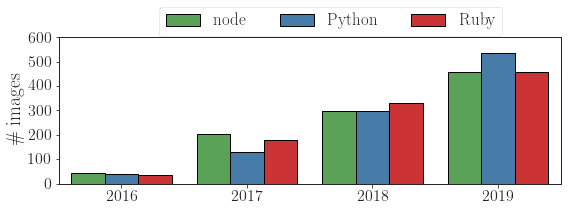

In [18]:
df_tmp=packages[['image','last_updated','base']].drop_duplicates()
df_tmp['year'] = df_tmp['last_updated'].apply(lambda d: str(d).split('-')[0])
df_tmp = df_tmp.groupby(['base','year']).count().reset_index()
d = {'python':'Python','ruby':'Ruby'}
df_tmp['base'] = df_tmp['base'].replace(d)
ax = sns.barplot(x="year", 
                 y="image", 
                 hue="base", 
                 data=df_tmp, 
                 palette=reversed(Set1),
                 linewidth=1)
ax.figure.set_size_inches(9,2.7)
ax.set_xlabel("")
ax.set_ylabel('\# images')
for patch in ax.patches:
    patch.set_edgecolor('black')
ax.set_ylim(0,601)
plt.yticks(np.arange(0, 601, 100))

ax.legend(bbox_to_anchor= (0.9, 1.26),fontsize=17, ncol=3)

In [12]:
# Number of pulls for all images
packages[['image','popularity']].drop_duplicates().popularity.sum()

876739651

In [13]:
# Number of unique packages
len(packages[['base','package']].drop_duplicates())

12208

In [14]:
# Number of unique packages
len(packages[['base','package','version_release']].drop_duplicates())

28363

In [15]:
# Number of unique packages found in images
packages[['package','base']].drop_duplicates().groupby(['base']).count()

,package
base,
node,5123
python,3867
ruby,3218


In [16]:
# Number of unique package release found in images
packages[['package','base','version_release']].drop_duplicates().groupby(['base']).count()

,package,version_release
base,,
node,10435,10435
python,8656,8656
ruby,9272,9272


In [17]:
packages.groupby(['image','base'])

## Vulnerabilities

In [19]:
vulns = pd.read_csv('../data/vulnerabilities_snyk.csv', dtype=str)
# To have this dataset, you have to ask permission from Snyk.io

In [20]:
vulns.id.unique().size

3967

In [21]:
vulns.package.unique().size

2527

In [22]:
vulns.published.max()

'2020-04-12T14:07:12.088673Z'

In [23]:
vulns[['id','base']].drop_duplicates().groupby(['base']).count()/3967

,id
base,
js,0.556088
python,0.270481
ruby,0.173431


In [24]:
affected = pd.read_csv('../data/vulnerable_packages_today.csv')
# To have this dataset, you have to ask permission from Snyk.io
affected.package.fillna('nan', inplace=True)
affected['last_updated'] = pd.to_datetime(affected['last_updated'])

mask  = affected.image.isin(candidates_3000.image)
affected = affected[mask]
affected.drop_duplicates(inplace=True)

affected.shape

(42504, 16)

In [25]:
affected.id.unique().size

632

In [26]:
affected[['id','base']].drop_duplicates().groupby(['base']).count()

,id
base,
node,272
python,152
ruby,208


In [27]:
(affected[['base','package','version_today']]
 .drop_duplicates()
 .groupby('base')
 .count()*100/packages[['base','package','version_today']]
 .drop_duplicates()
 .groupby('base')
 .count())

,package,version_today
base,,
node,5.391922,5.391922
python,3.754621,3.754621
ruby,5.985764,5.985764


In [28]:
(affected[['base','package']]
 .drop_duplicates()
 .groupby('base')
 .count())

,package
base,
node,158
python,65
ruby,94


In [29]:
affected.head()

,image,package,base,operating,popularity,last_updated,core,version_today,id,affecting,published,disclosed,severity,vuln_name,affected,need_update
0,centralci/alpine-node,kind-of,node,Alpine,406310,2019-10-28,False,6.0.2,SNYK-JS-KINDOF-537849,>=6.0.0 <6.0.3,2019-12-16,2019-12-16,low,Information Exposure,True,False
1,centralci/alpine-node,yargs-parser,node,Alpine,406310,2019-10-28,True,5.0.0,SNYK-JS-YARGSPARSER-560381,<13.1.2||>=14.0.0 <15.0.1||>=16.0.0 <18.1.1,2020-03-16,2020-03-16,medium,Prototype Pollution,True,False
2,centralci/alpine-node,npm,node,Alpine,406310,2019-10-28,True,6.7.0,SNYK-JS-NPM-537606,<6.13.3,2019-12-12,2019-12-11,high,Arbitrary File Write,True,True
3,centralci/alpine-node,npm,node,Alpine,406310,2019-10-28,True,6.7.0,SNYK-JS-NPM-537604,<6.13.3,2019-12-12,2019-12-11,low,Unauthorized File Access,True,True
4,centralci/alpine-node,npm,node,Alpine,406310,2019-10-28,True,6.7.0,SNYK-JS-NPM-537603,<6.13.4,2019-12-12,2019-12-11,high,Arbitrary File Overwrite,True,True


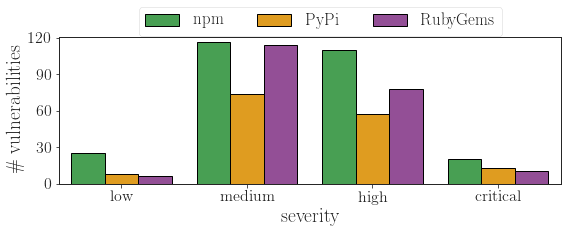

In [30]:
df_tmp=affected[['id','base','severity']].drop_duplicates().groupby(['severity','base']).count().reset_index()
d = {'node':'npm','python':'PyPi','ruby':'RubyGems'}
df_tmp['base'] = df_tmp['base'].replace(d)
ax = sns.barplot(x="severity", 
                 y="id", 
                 hue="base", 
                 #hue_order = ['open','resolved'],
                 order=['low', 'medium', 'high','critical'],
                 data=df_tmp, 
                 palette=flatui, 
                 linewidth=1)
ax.figure.set_size_inches(9,2.7)
ax.set_xlabel("severity")
ax.set_ylabel('\# vulnerabilities')
for patch in ax.patches:
    patch.set_edgecolor('black')
ax.set_ylim(0,121)
plt.yticks(np.arange(0, 121, 30))

ax.legend(bbox_to_anchor= (0.9, 1.26),fontsize=17, ncol=3)

In [115]:
df_tmp

,severity,base,id
0,critical,npm,20
1,critical,PyPi,13
2,critical,RubyGems,10
3,high,npm,110
4,high,PyPi,57
5,high,RubyGems,78
6,low,npm,25
7,low,PyPi,8
8,low,RubyGems,6
9,medium,npm,117


In [31]:
tmp = (df_tmp
       .reset_index()
 .pivot_table(index=['base'], columns='severity', values='id')
 .reset_index()
 .set_index('base')
)
tmp = tmp [['low','medium','high','critical']]
tmp= tmp.reset_index().sort_values('low', ascending=False).set_index('base')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  if __name__ == '__main__':


(array([0, 1, 2]),
 [Text(0, 0, 'npm'), Text(1, 0, 'PyPi'), Text(2, 0, 'RubyGems')])

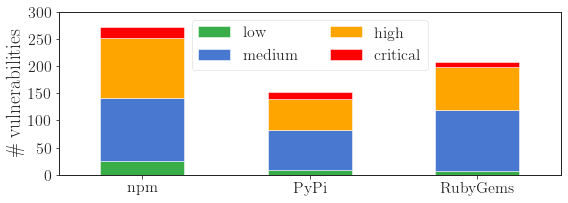

In [32]:
#Which packages are more vulnerable

ax = tmp.plot.bar(stacked=True,  color = [colors[r] for r in ['up-to-date','patch','minor','major']],)
ax.set(
    xlabel='',
    ylabel = '\# vulnerabilities',
    ylim=(0,301)
)
plt.yticks(pd.np.arange(0, 301, 50)) 
ax.legend(loc ='upper center', ncol=2)
ax.figure.set_size_inches(9,3)
plt.xticks(rotation=0)

## Popularity

In [86]:
all_candidates = pd.read_csv('../data/all_thirdParty_images.csv')
pop = pd.read_csv('../data/community_images.csv')

In [88]:
all_candidates.sample()

,image,base
63826,albinos:docker-pypi_server:latest,python


In [93]:
len(all_candidates)

86248

In [89]:
pop.sample()

,slug,popularity
552477,dougr/sinatra,94


In [91]:
all_candidates['slug'] = all_candidates['image'].apply(lambda x: x.split(':')[0]+'/'+x.split(':')[1])

In [94]:
all_candidates = (all_candidates
                  .merge(pop,
                         on ='slug',
                         how = 'left'
                        )
                 )

In [103]:
packages[['image','popularity','base']].drop_duplicates().groupby('base').popularity.sum()/all_candidates.groupby('base').popularity.sum()

base
node      0.856939
python    0.960029
ruby      0.929066
Name: popularity, dtype: float64

base
node      442029640
python    340401087
ruby       94308924
Name: popularity, dtype: int64

In [100]:
876739651/971906843

0.9020819817398898